In [38]:
import pandas as pd
import numpy as np

In [39]:
 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import os
 

In [40]:
data = pd.read_csv("T1.csv")

In [41]:
#rename column without the spaces
data.rename(columns={'LV ActivePower (kW)':'ActivePower(kW)',"Wind Speed (m/s)":"WindSpeed(m/s)","Wind Direction (°)":"Wind_Direction"},
                inplace=True)
data.head()

,Date/Time,ActivePower(kW),WindSpeed(m/s),Theoretical_Power_Curve (KWh),Wind_Direction
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [42]:
data.head()

,Date/Time,ActivePower(kW),WindSpeed(m/s),Theoretical_Power_Curve (KWh),Wind_Direction
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [43]:
#covert date and time into ('%d %m %Y %H:%M') format
data['Date/Time'] = pd.to_datetime(data['Date/Time'],format='%d %m %Y %H:%M')

In [44]:
#make separate columns for date 
data['year']=data['Date/Time'].dt.year 
data['month']=data['Date/Time'].dt.month 
data['day']=data['Date/Time'].dt.day



In [45]:
data.head()

,Date/Time,ActivePower(kW),WindSpeed(m/s),Theoretical_Power_Curve (KWh),Wind_Direction,year,month,day
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,2018,1,1
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,2018,1,1
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,2018,1,1
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087,2018,1,1
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,2018,1,1


In [46]:
#make separate column for time
data['Hour'] = data['Date/Time'].dt.hour 
data['minute'] = data['Date/Time'].dt.minute 

In [47]:
data.head()

,Date/Time,ActivePower(kW),WindSpeed(m/s),Theoretical_Power_Curve (KWh),Wind_Direction,year,month,day,Hour,minute
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,2018,1,1,0,0
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,2018,1,1,0,10
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,2018,1,1,0,20
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087,2018,1,1,0,30
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,2018,1,1,0,40


In [48]:
#function for finding out the mean speed
#fuction to rewrite the wind speed in intervals of 0.5
#example: if wind speed is between 4.25-4.75 make it 4.5 and if value is in between 4.75-5.25 make it 4
def speed(x):
    x = round(x,2)
    a = x//1
    a,b = a+0.25,a+0.75
    if x < a:
        x = a - 0.25
    else:
        x = b -0.25
    return x

    
    

In [49]:
#apply the speed function in each row of data['WindSpeed(m/s)'] and store in data['mean_speed']
data['mean_speed'] = data['WindSpeed(m/s)'].apply(speed)

In [50]:
data.head(100)

,Date/Time,ActivePower(kW),WindSpeed(m/s),Theoretical_Power_Curve (KWh),Wind_Direction,year,month,day,Hour,minute,mean_speed
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,2018,1,1,0,0,5.5
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,2018,1,1,0,10,5.5
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,2018,1,1,0,20,5.0
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087,2018,1,1,0,30,5.5
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,2018,1,1,0,40,5.5
...,...,...,...,...,...,...,...,...,...,...,...
95,2018-01-01 15:50:00,2820.512939,10.772420,3186.029883,225.276398,2018,1,1,15,50,10.5
96,2018-01-01 16:00:00,2812.279053,10.647520,3133.259224,224.680603,2018,1,1,16,0,10.5
97,2018-01-01 16:10:00,2530.447021,9.982661,2781.274041,225.519501,2018,1,1,16,10,9.5
98,2018-01-01 16:20:00,2399.121094,9.874386,2711.492458,227.273804,2018,1,1,16,20,9.5


In [51]:
#function for rewriting wind direction for 30 intervals. 
#For example: wind directions between 15 and 45 turns 30,wind speeds between 45 and 75 turns 60
def mean_direction(x):
    list=[]
    i=15
    while i<=375:
        list.append(i)
        i+=30
        
    for i in list:
        if x < i:
            x=i-15
            if x==360:
                return 0
            else:
                return x

In [52]:
#adding a new column as "mean_Direction" with function mean_direction().

data["mean_Direction"]=data["Wind_Direction"].apply(mean_direction)
data.head()

,Date/Time,ActivePower(kW),WindSpeed(m/s),Theoretical_Power_Curve (KWh),Wind_Direction,year,month,day,Hour,minute,mean_speed,mean_Direction
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,2018,1,1,0,0,5.5,270
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,2018,1,1,0,10,5.5,270
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,2018,1,1,0,20,5.0,270
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087,2018,1,1,0,30,5.5,270
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,2018,1,1,0,40,5.5,270


In [53]:
#function for rewriting wind direction with letters. 
#For example: 0=N, 30=NNE 60=NEE etc.
def wind_direction(x):
    if x==0:
        return "N"
    if x==30:
        return "NNE"
    if x==60:
        return "NEE" 
    if x==90:
        return "E" 
    if x==120:
        return "SEE" 
    if x==150:
        return "SSE" 
    if x==180:
        return "S" 
    if x==210:
        return "SSW" 
    if x==240:
        return "SWW" 
    if x==270:
        return "W" 
    if x==300:
        return "NWW" 
    if x==330:
        return "NNW"
  

In [54]:
#apply wind direction to each row in data['mean_Direction'] and store it in data['wind_direction']
data['wind_direction'] = data['mean_Direction'].apply(wind_direction)

In [55]:
data.head()

,Date/Time,ActivePower(kW),WindSpeed(m/s),Theoretical_Power_Curve (KWh),Wind_Direction,year,month,day,Hour,minute,mean_speed,mean_Direction,wind_direction
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,2018,1,1,0,0,5.5,270,W
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,2018,1,1,0,10,5.5,270,W
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,2018,1,1,0,20,5.0,270,W
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087,2018,1,1,0,30,5.5,270,W
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,2018,1,1,0,40,5.5,270,W


In [56]:
#creating summary dataframes for all directions from clean data in a for loop.
list_data=[]
list_yon=["N","NNE","NEE","E","SEE","SSE","S","SSW","SWW","W","NWW","NNW"]
for i in range(0,12):
    data1T_A=data[data["wind_direction"]==list_yon[i]]
#creating summary dataframes for all directions from clean data in a for loop as we did when creating direction dataframe.
list_data=[]
list_yon=["N","NNE","NEE","E","SEE","SSE","S","SSW","SWW","W","NWW","NNW"]
for i in range(0,12):
    data1T_A=data[data["wind_direction"]==list_yon[i]]
    #
    DepGroup_A = data1T_A.groupby("mean_speed")
    data_T_A=DepGroup_A.mean()
    #
    data_T_A.drop(columns={"WindSpeed(m/s)","Wind_Direction","mean_Direction"},inplace=True)
    #
    listTA_WS=data_T_A.index.copy()
    data_T_A["WindSpeed(m/s)"]=listTA_WS
    #
    data_T_A=data_T_A[["WindSpeed(m/s)","ActivePower(kW)","Theoretical_Power_Curve (KWh)"]]
    #
    data_T_A["Index"]=list(range(1,len(data_T_A.index)+1))
    data_T_A.set_index("Index",inplace=True)
    #
    data_T_A=data_T_A.round({'ActivePower(kW)': 2, 'Theoretical_Power_Curve (KWh)': 2})
    #
    data_T_A["count"]=[len(data1T_A["mean_speed"][data1T_A["mean_speed"]==x]) 
                            for x in data_T_A["WindSpeed(m/s)"]]
    list_data.append(data_T_A)
    
data_T_N=list_data[0]
data_T_NNE=list_data[1]
data_T_NEE=list_data[2]
data_T_E=list_data[3]
data_T_SEE=list_data[4]
data_T_SSE=list_data[5]
data_T_S=list_data[6]
data_T_SSW=list_data[7]
data_T_SWW=list_data[8]
data_T_W=list_data[9]
data_T_NWW=list_data[10]
data_T_NNW=list_data[11]

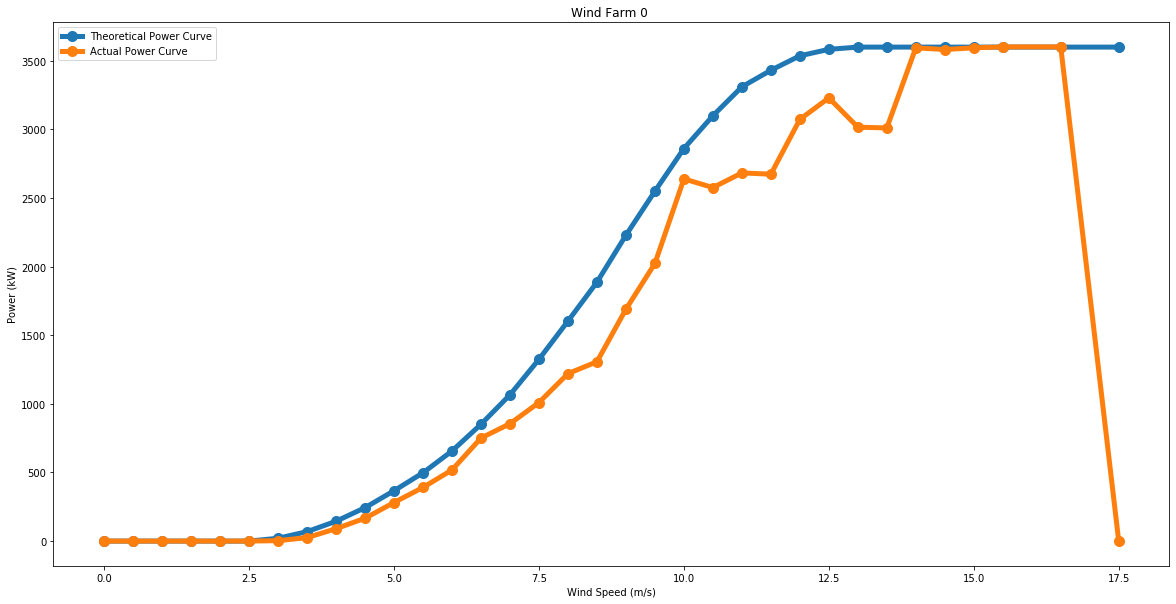

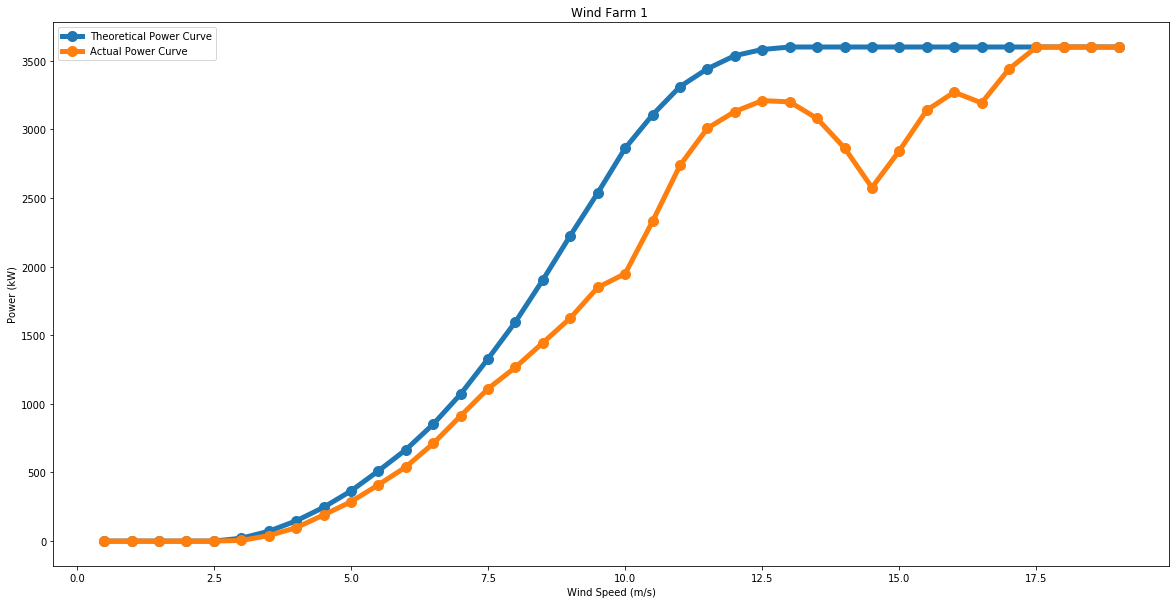

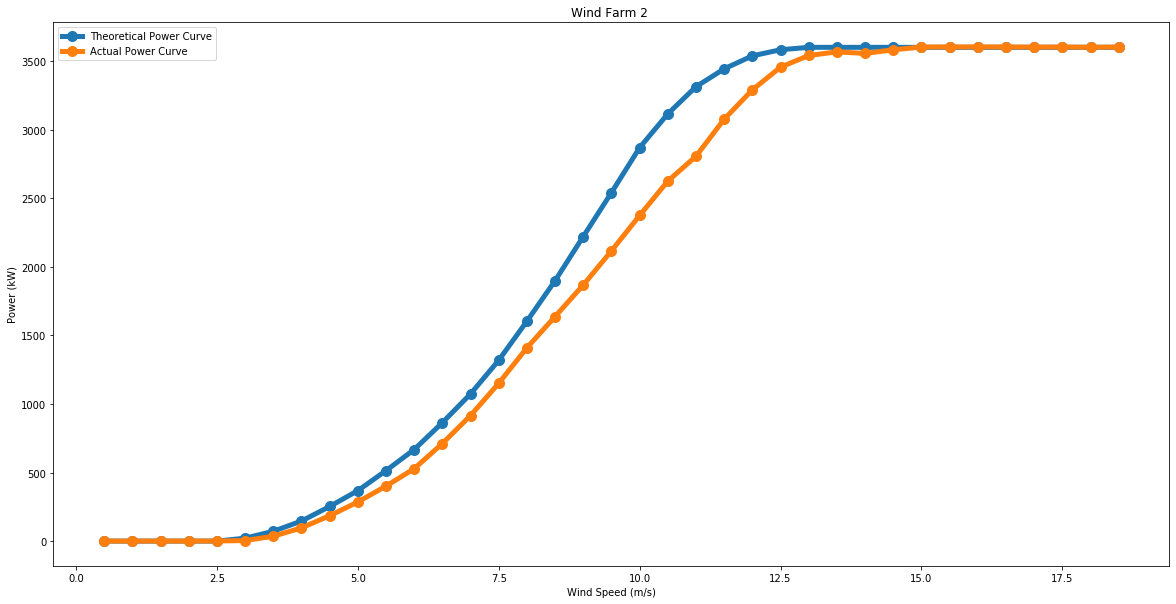

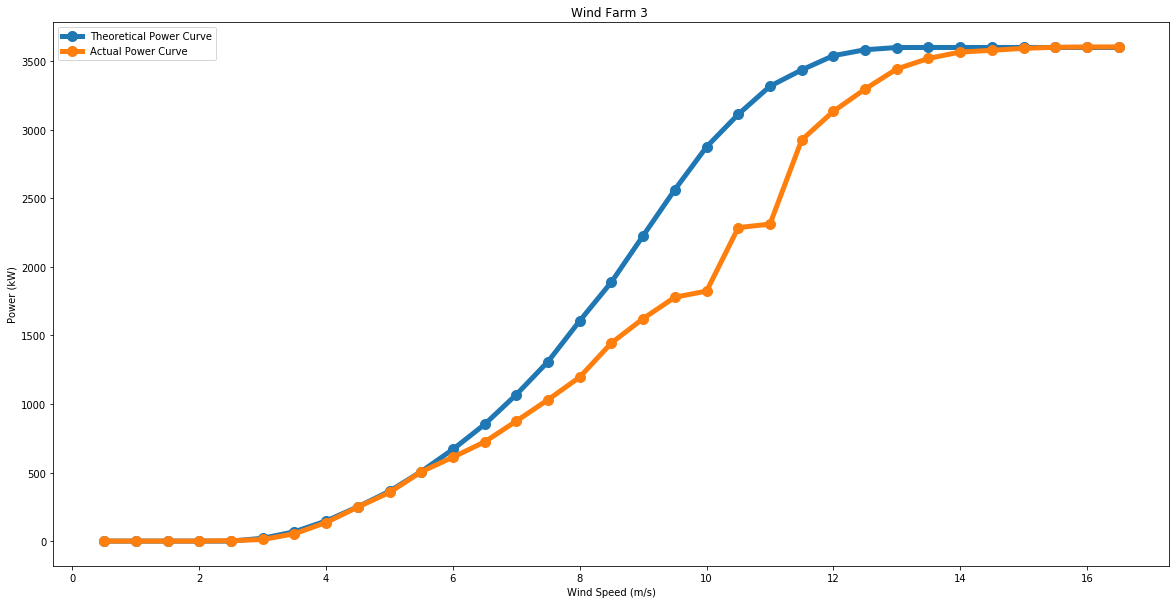

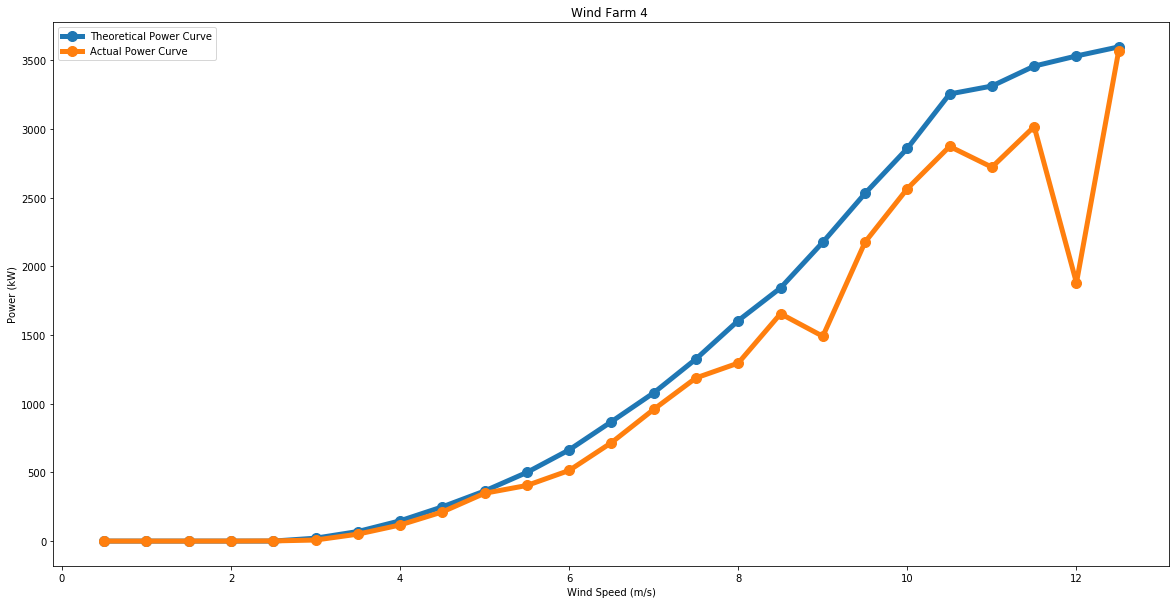

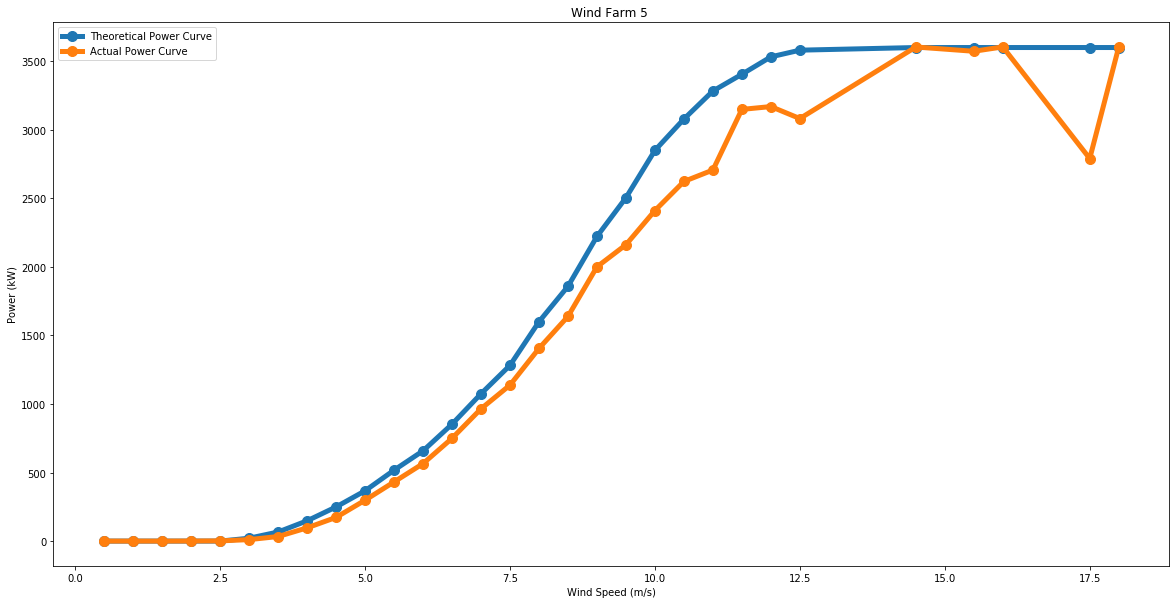

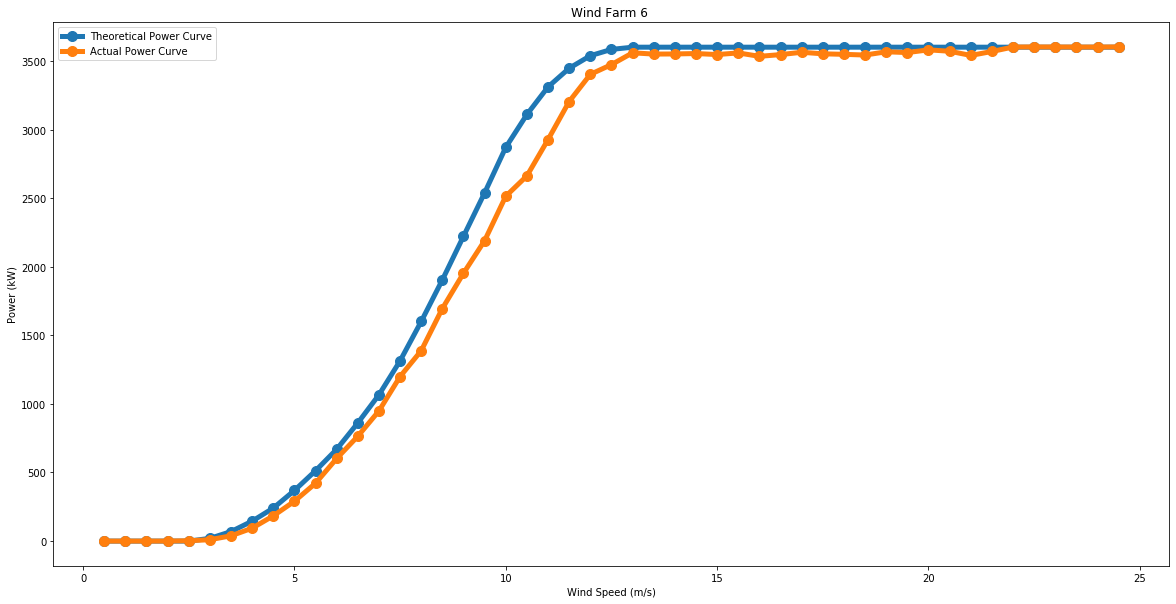

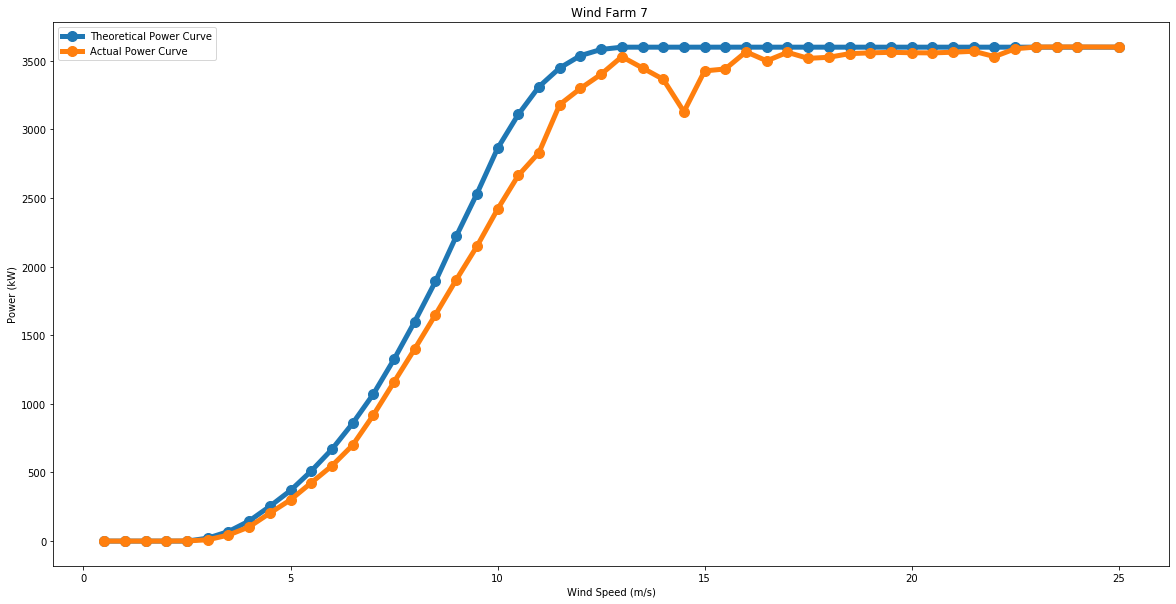

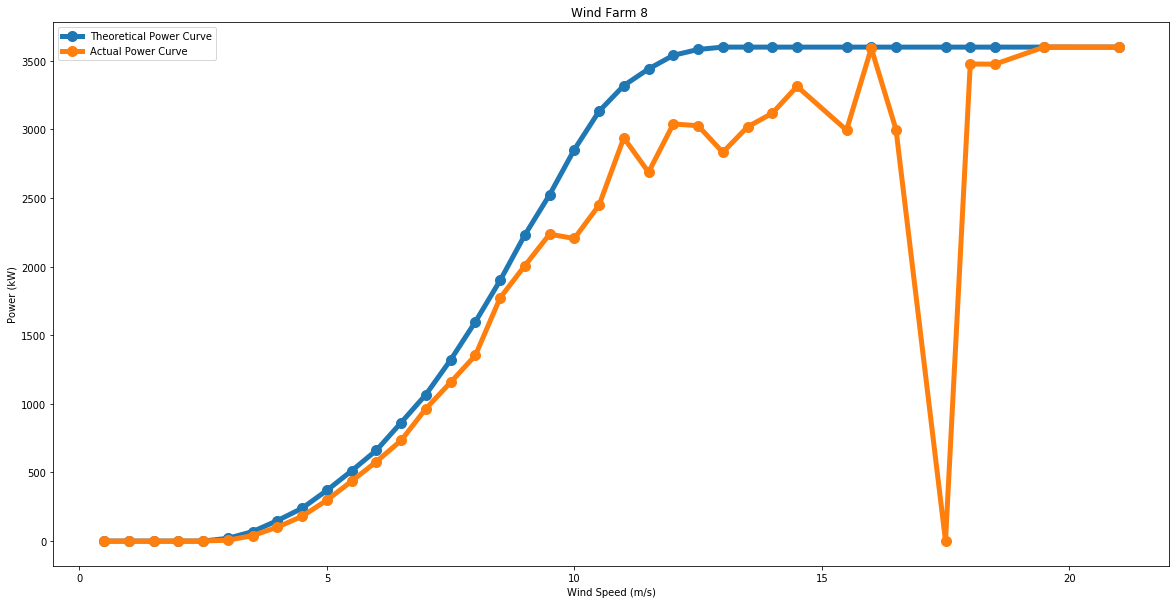

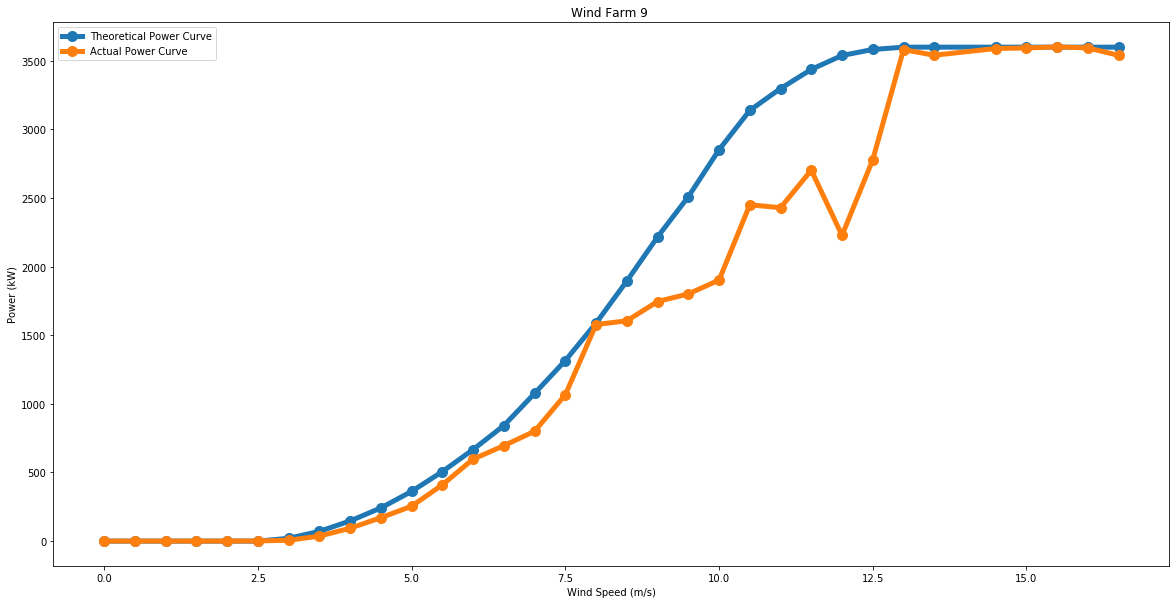

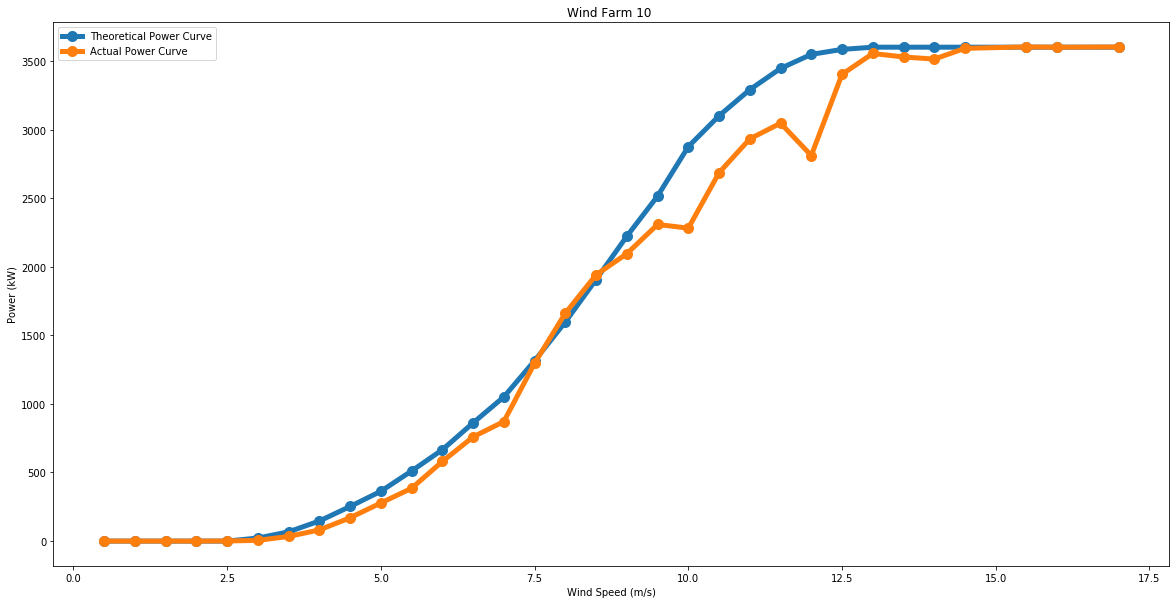

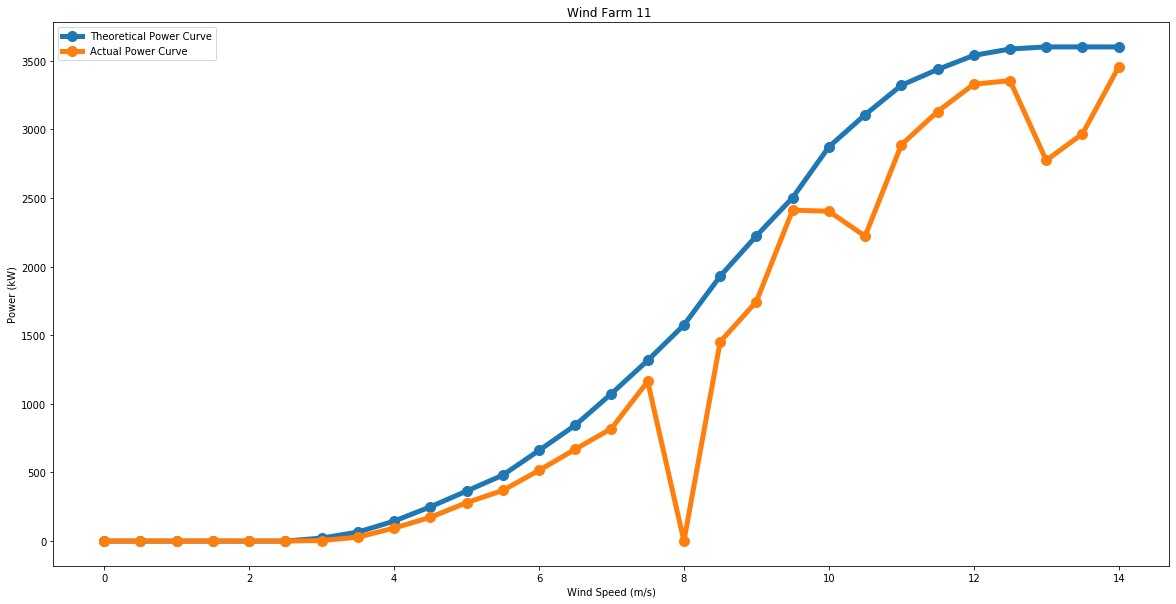

In [57]:
#Drawing power curve of the turbine for all directions.
list_table=[data_T_N,data_T_NNE,data_T_NEE,data_T_E,data_T_SEE,data_T_SSE,data_T_S,
            data_T_SSW,data_T_SWW,data_T_W,data_T_NWW,data_T_NNW]

list_tableName=["N","NNE","NEE","E","SEE","SSE","S","SSW","SWW","W","NWW","NNW"]

def graph_T(i):
    fig = plt.figure(figsize=(20,10))  
    plt.plot(list_table[i]["WindSpeed(m/s)"],list_table[i]["Theoretical_Power_Curve (KWh)"],label="Theoretical Power Curve",
             marker="o",markersize=10,linewidth = 5)
    plt.plot(list_table[i]["WindSpeed(m/s)"],list_table[i]["ActivePower(kW)"],label="Actual Power Curve",
             marker="o",markersize=10,linewidth = 5)
    plt.xlabel("Wind Speed (m/s)")
    plt.ylabel("Power (kW)")
    plt.title("Wind Farm {} ".format(i))
    plt.legend()
    plt.show()
    fig.savefig("{}_{}_Powercurve.jpeg".format(i,i))
    plt.close(fig)

# "N"=0, "NNE"=1,"NEE"=2,"E"=3,"SEE"=4,"SSE"=5,"S"=6,"SSW"=7,"SWW"=8,"W"=9,"NWW"=10,"NNW"=11

for i in range(0,12):
    graph_T(i)

In [58]:
data_new

,index,Date/Time,ActivePower(kW),WindSpeed(m/s),Theoretical_Power_Curve (KWh),Wind_Direction,year,month,day,Hour,minute,mean_speed,mean_Direction,wind_direction
0,0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,2018,1,1,0,0,5.5,270,W
1,1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,2018,1,1,0,10,5.5,270,W
2,2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,2018,1,1,0,20,5.0,270,W
3,3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087,2018,1,1,0,30,5.5,270,W
4,4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,2018,1,1,0,40,5.5,270,W
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39279,50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793,80.502724,2018,12,31,23,10,11.5,90,E
39280,50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771,84.062599,2018,12,31,23,20,7.5,90,E
39281,50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755,84.742500,2018,12,31,23,30,8.5,90,E
39282,50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503,84.297913,2018,12,31,23,40,9.5,90,E


In [59]:
#the value actually used for predicting
X = data[[ 'Wind_Direction', 'month',
       'day', 'Hour', 'mean_speed']]

In [60]:
X


,Wind_Direction,month,day,Hour,mean_speed
0,259.994904,1,1,0,5.5
1,268.641113,1,1,0,5.5
2,272.564789,1,1,0,5.0
3,271.258087,1,1,0,5.5
4,265.674286,1,1,0,5.5
...,...,...,...,...,...
50525,80.502724,12,31,23,11.5
50526,84.062599,12,31,23,7.5
50527,84.742500,12,31,23,8.5
50528,84.297913,12,31,23,9.5


In [61]:

y = data['ActivePower(kW)']

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.externals import joblib


In [63]:
#split the data into training set and testing set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [64]:
#train the regression model using lasso algorithm
model_lasso = Lasso(alpha=0.01)
model = model_lasso.fit(X_train, y_train) 
pred_train_lasso= model_lasso.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
print(r2_score(y_train, pred_train_lasso))

pred_test_lasso= model_lasso.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_lasso))) 
print(r2_score(y_test, pred_test_lasso))

533.8827541152459
0.834908161147255
539.8257889435563
0.829215337935233


In [65]:
#predict the output using predict functions
model.predict([[270,1,1,23,5.5]])

array([745.2822237])

In [66]:
#save the weights and bais for future references
joblib.dump(model,'lasso.pk1')

['lasso.pk1']